In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
def phase_oracle(circuit):
    circuit.cz(0, 2)
    circuit.cz(1, 2)

In [4]:
def diffuser(circuit):
    """Apply inversion about the average step of Grover's algorithm."""
    qubits = circuit.qubits
    nqubits = len(qubits)
    
    for q in range(nqubits):
        circuit.h(q)
        circuit.x(q)
    
    # Do controlled-Z
    circuit.h(2)
    circuit.ccx(0,1,2)
    circuit.h(2)
    
    for q in range(nqubits):
        circuit.x(q)
        circuit.h(q)

In [5]:
n = 3
barriers = True

grover_circuit = QuantumCircuit(n)

for qubit in range(n):
    grover_circuit.h(qubit)

if barriers:
    grover_circuit.barrier()

phase_oracle(grover_circuit)

if barriers:
    grover_circuit.barrier()

diffuser(grover_circuit)

grover_circuit.measure_all()

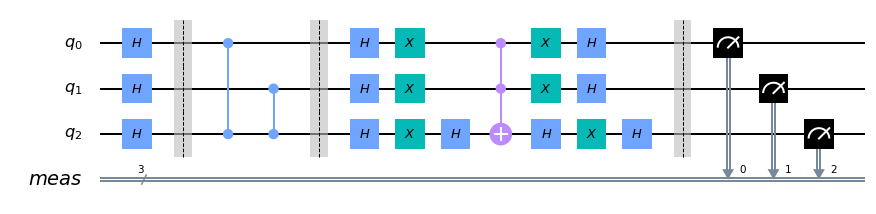

In [6]:
grover_circuit.draw(output="mpl")

In [7]:
#Experiment with IBM Q Account
import os
import configparser
config = configparser.ConfigParser()
try:
    f = open("/tmp/secrets/qiskitsecret/qiskit-secret.cfg", 'r')
    config.readfp(f)
finally:
    f.close()

options = {
    'auth_version':         3,
    'token':          config['AUTH TOKENS']['token'],
}
print(options.get('token'))
IBMQ.save_account(options.get('token'))

2597f9a2a1c46378637147f6828e47f63cff72c00edd0c422f6189ee085d2a03d7df8a610a39b5eb6c30d2d0b725ab3c5fd0e235de158eb851ec8c0725a602d7


/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: This method will be removed in future versions.  Use 'parser.read_file()' instead.
  import sys


In [8]:
provider = IBMQ.load_account()


In [9]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_ourense


In [10]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(grover_circuit, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


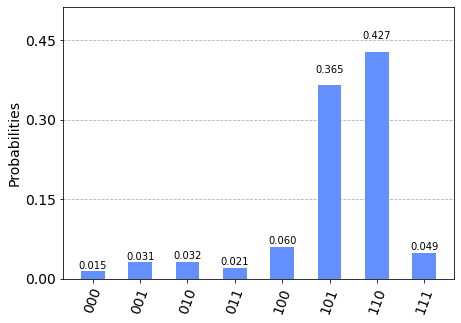

In [11]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)